### Sravani Tungala

### TheSparksFoundation

### TASK#4:

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('globalterrorism.csv', encoding='ISO-8859–1')

In [13]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Number of observations

In [15]:
df.shape

(181691, 135)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [20]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

### Checking for duplicates

In [22]:
duplicated=df.duplicated()
print(duplicated.sum())
df[duplicated]


0


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [24]:
df.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [26]:
df.rename(columns={"iyear" : "Year", "imonth" : "Month", "iday" : "Day", "country_txt" : "Country",
                   "region_txt" : "Region", "provstate" : "State", "latitude" : "Latitude", 
                   "longitude" : "Longitude", "summary" : "Summary", "attacktype1_txt" : "AttackType", 
                   "targtype1_txt" : "TargetType", "gname" : "Group", "weaptype1_txt" : "WeaponType", 
                   "nkill" : "Kill", "nwound" : "Wound",}, inplace=True)

In [27]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
df.drop(['addnotes', 'scite1','scite2','scite3','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','related'], axis='columns', inplace=True)

In [30]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df = df[["Year", "Month", "Day", "AttackType", "TargetType", "Country", "Region",
         "Latitude", "Longitude", "Summary", "State", "motive", "WeaponType", 
         "Kill", "Wound", "Group", "Summary"]]
df

,Year,Month,Day,AttackType,TargetType,Country,Region,Latitude,Longitude,Summary,State,motive,WeaponType,Kill,Wound,Group,Summary
0,1970,7,2,Assassination,Private Citizens & Property,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,NaN,NaN,Unknown,1.0,0.0,MANO-D,NaN
1,1970,0,0,Hostage Taking (Kidnapping),Government (Diplomatic),Mexico,North America,19.371887,-99.086624,NaN,Federal,NaN,Unknown,0.0,0.0,23rd of September Communist League,NaN
2,1970,1,0,Assassination,Journalists & Media,Philippines,Southeast Asia,15.478598,120.599741,NaN,Tarlac,NaN,Unknown,1.0,0.0,Unknown,NaN
3,1970,1,0,Bombing/Explosion,Government (Diplomatic),Greece,Western Europe,37.997490,23.762728,NaN,Attica,NaN,Explosives,NaN,NaN,Unknown,NaN
4,1970,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Japan,East Asia,33.580412,130.396361,NaN,Fukouka,NaN,Incendiary,NaN,NaN,Unknown,NaN
5,1970,1,1,Armed Assault,Police,United States,North America,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,Illinois,To protest the Cairo Illinois Police Deparment,Firearms,0.0,0.0,Black Nationalists,1/1/1970: Unknown African American assailants ...
6,1970,1,2,Assassination,Police,Uruguay,South America,-34.891151,-56.187214,NaN,Montevideo,NaN,Firearms,0.0,0.0,Tupamaros (Uruguay),NaN
7,1970,1,2,Bombing/Explosion,Utilities,United States,North America,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,California,NaN,Explosives,0.0,0.0,Unknown,1/2/1970: Unknown perpetrators detonated explo...
8,1970,1,2,Facility/Infrastructure Attack,Military,United States,North America,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New ...",Wisconsin,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,New Year's Gang,"1/2/1970: Karl Armstrong, a member of the New ..."
9,1970,1,3,Facility/Infrastructure Attack,Government (General),United States,North America,43.072950,-89.386694,"1/3/1970: Karl Armstrong, a member of the New ...",Wisconsin,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,New Year's Gang,"1/3/1970: Karl Armstrong, a member of the New ..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
Year          181691 non-null int64
Month         181691 non-null int64
Day           181691 non-null int64
AttackType    181691 non-null object
TargetType    181691 non-null object
Country       181691 non-null object
Region        181691 non-null object
Latitude      177135 non-null float64
Longitude     177134 non-null float64
Summary       115562 non-null object
State         181270 non-null object
motive        50561 non-null object
WeaponType    181691 non-null object
Kill          171378 non-null float64
Wound         165380 non-null float64
Group         181691 non-null object
Summary       115562 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [33]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [34]:
df.corr()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Kill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wound,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


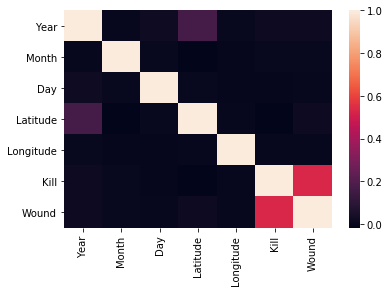

In [35]:
sns.heatmap(df.corr())

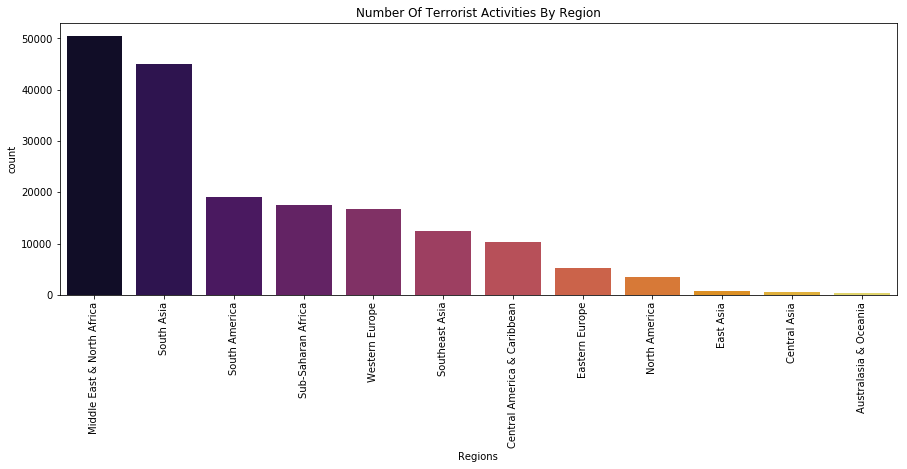

In [36]:
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=df,palette='inferno',order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

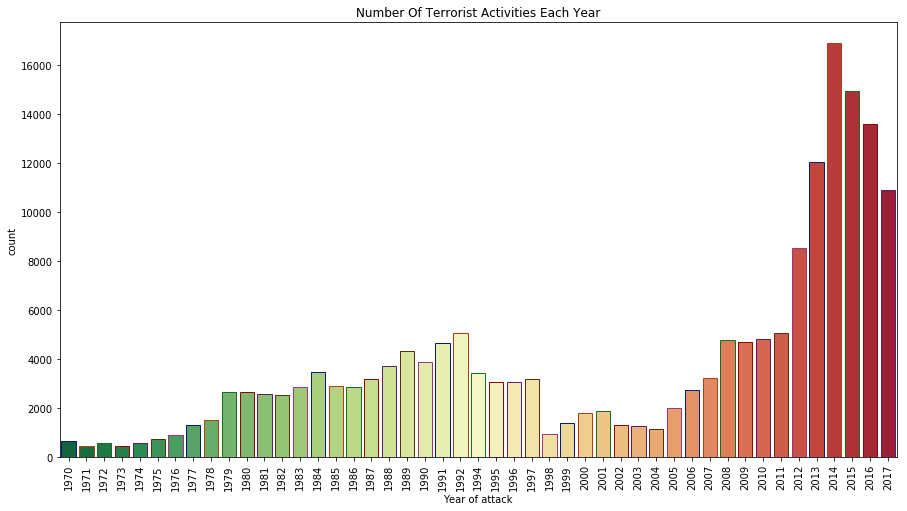

In [37]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

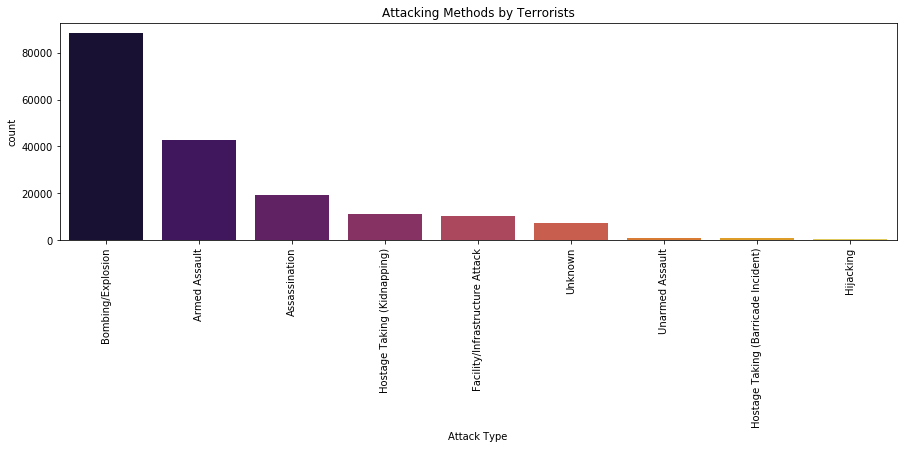

In [38]:
plt.subplots(figsize=(15,4))
sns.countplot('AttackType',data=df,palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

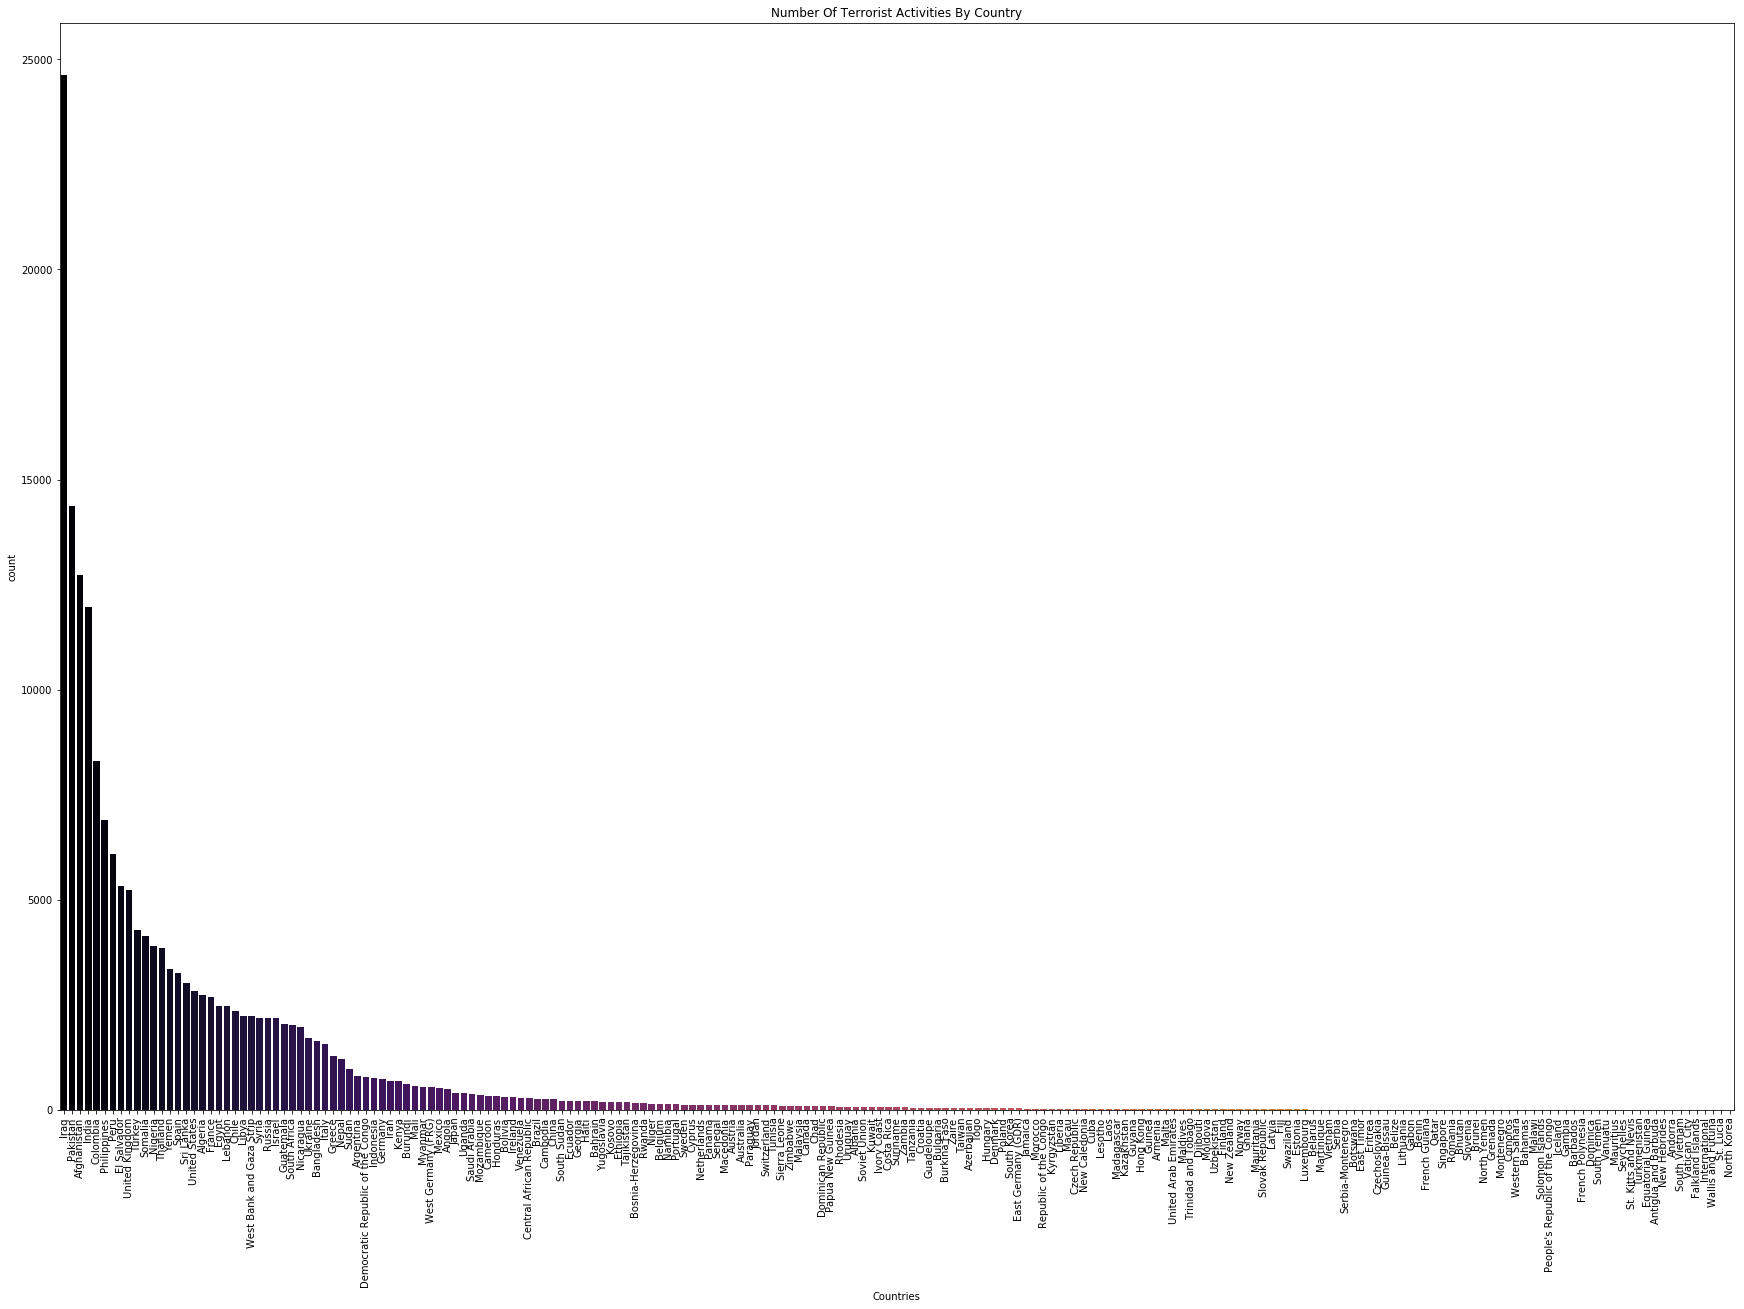

In [44]:
plt.subplots(figsize=(30,20))
sns.countplot('Country',data=df,palette='inferno',order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.title('Number Of Terrorist Activities By Country')
plt.show()

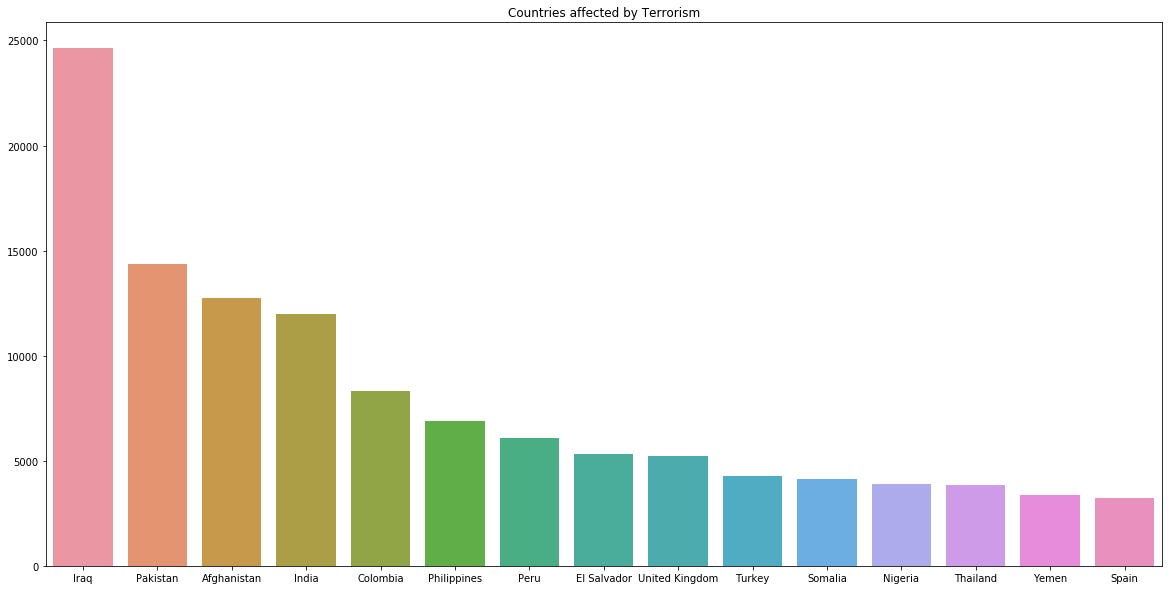

In [65]:
plt.figure(figsize=(20,10))
x=df["Country"].value_counts()[:15].index
y=df["Country"].value_counts()[:15].values
sns.barplot(x, y)
plt.title("Countries affected by Terrorism")
plt.show()

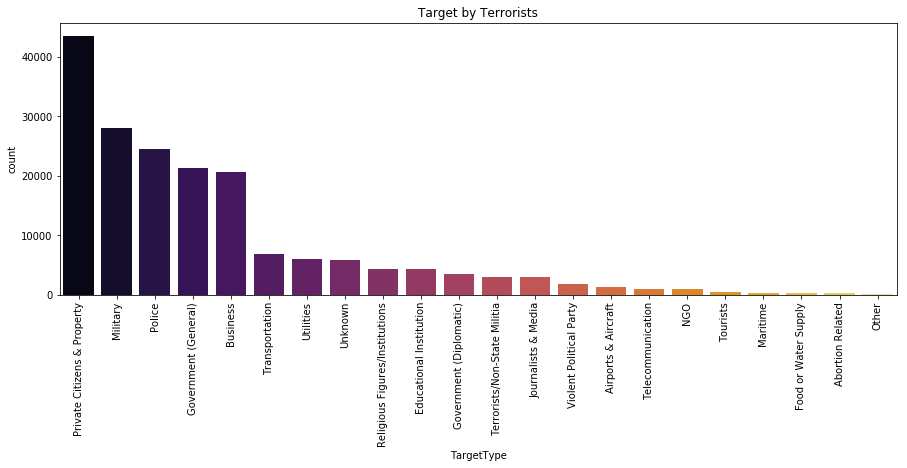

In [45]:
plt.subplots(figsize=(15,5))
sns.countplot('TargetType',data=df,palette='inferno',order=df['TargetType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('TargetType')
plt.title('Target by Terrorists')
plt.show()

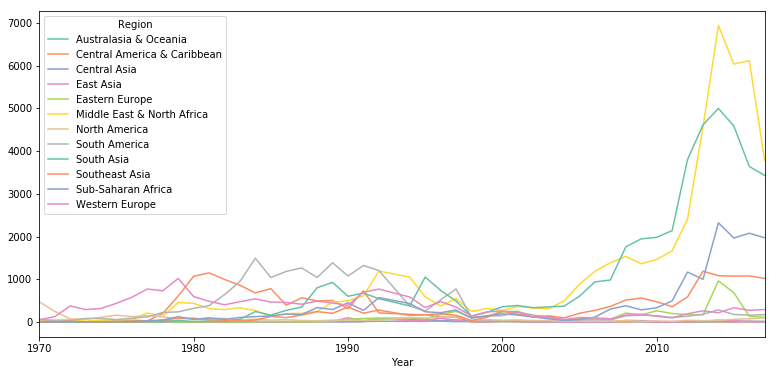

In [46]:
df_region=pd.crosstab(df.Year,df.Region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

Text(0, 0.5, 'Wounded')

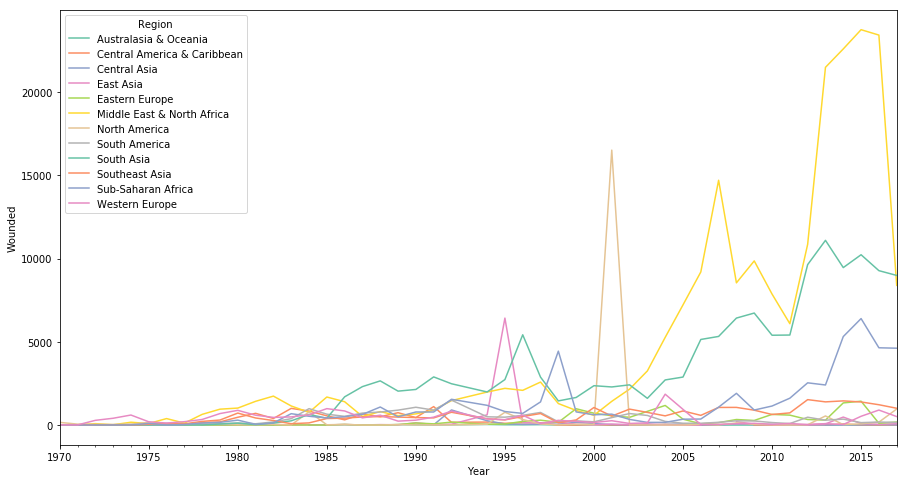

In [50]:
d=df.groupby(['Year','Region'])['Wound'].sum()
plot_df = d.unstack('Region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

In [52]:
df['casualties']=df['Kill']+df['Wound']

In [59]:
df['Country'].value_counts() # Counts number of terrorist attacks Country wise
df['Region'].value_counts()
df['Group'].value_counts()
#df['City'].value_counts()
df['AttackType'].value_counts()
df['TargetType'].value_counts()
#df['TargesubType'].value_counts()
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [61]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Kill'].max(),'that took place in',df.loc[df['Kill'].idxmax()].Country)
df.groupby(['Region', 'Year'])['casualties'].count()

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


Region                 Year
Australasia & Oceania  1970      1
                       1971      1
                       1972      8
                       1973      1
                       1974      1
                       1978      2
                       1979      2
                       1980      5
                       1981      3
                       1982      1
                       1984     11
                       1985      7
                       1986      4
                       1987      3
                       1988     12
                       1989     29
                       1990     18
                       1991     10
                       1992     17
                       1994     14
                       1995     16
                       1996     19
                       1997      7
                       1998      6
                       1999      4
                       2000      6
                       2001      4
                       2002

### Cases of terrorist attacks in different regions of the world

In [62]:
df['Country'].value_counts() # Counts number of terrorist attacks Country wise
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

### Cases of terrorist attacks in countries

In [63]:
df['Country'].value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


### Types of terrorist attacks and their count

In [64]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

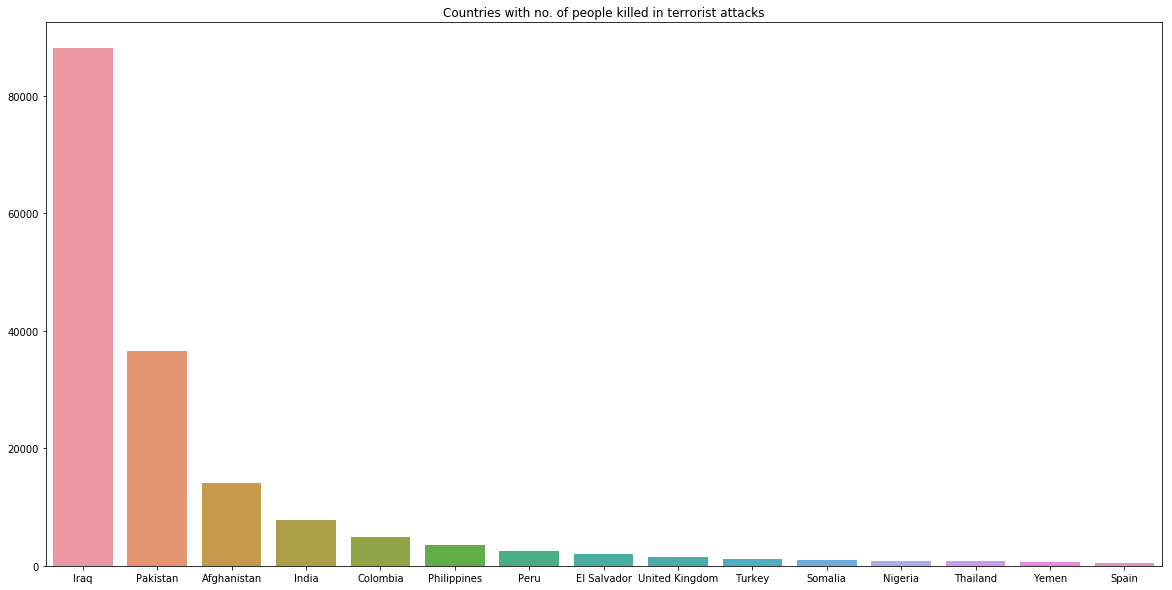

In [66]:
plt.figure(figsize=(20,10))

x=df["Country"].value_counts()[:15].index
y=df["Kill"].value_counts()[:15].values
sns.barplot(x, y)
plt.title("Countries with no. of people killed in terrorist attacks")
plt.show()

### Country with highest terroists attacks :Iraq

### Region with highest terroists attack:Middle East & North Africa

### Most Terroists attacktyepe:Explosion/Bombing

### Thank You